In [1]:
import keras

Using TensorFlow backend.


In [2]:
print (keras.__version__)

2.3.1


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
import os
os.listdir('/content/gdrive/My Drive')

['02_example.ipynb',
 'cc.en.300.vec.gz',
 'data_new.csv',
 'glove6b50dtxt.zip',
 'Colab Notebooks',
 'fractals_nature.jpg.653x0_q80_crop-smart.jpg',
 'broccoli-1.jpg',
 'aloe-spiral.jpg',
 'pinecone2.jpg',
 'air-bubbles-2.jpg']

In [0]:
 !cp /content/gdrive/My\ Drive/*.jpg /content/

In [6]:
os.listdir('/content')

['.config',
 'aloe-spiral.jpg',
 'broccoli-1.jpg',
 'air-bubbles-2.jpg',
 'pinecone2.jpg',
 'gdrive',
 'fractals_nature.jpg.653x0_q80_crop-smart.jpg',
 'sample_data']

In [0]:
#Classify ImageNet classes with ResNet50
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as preprocess_input_50
from keras.applications.resnet50 import decode_predictions as decode_predictions_50
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img,img_to_array 
from keras.applications.vgg16 import preprocess_input as preprocess_input_16
from keras.applications.vgg16 import decode_predictions as decode_predictions_16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_19
from keras.applications.vgg19 import decode_predictions as decode_predictions_19

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as preprocess_input_v3
from keras.applications.inception_v3 import decode_predictions as decode_predictions_v3
from keras.models import Model
import matplotlib.pyplot as plt
import skimage,imageio




In [0]:
def plot_n_image(X, Labels,n):
    """ plot first n images
    n has to be a square number
    """
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].imshow(X[0])
    axs[0, 0].set_title(Labels[0])
    axs[0, 1].imshow(X[1])
    axs[0, 1].set_title(Labels[1])
    axs[1, 0].imshow(X[2])
    axs[1, 0].set_title(Labels[2])
    axs[1, 1].imshow(X[3])
    axs[1, 1].set_title(Labels[3])
    fig.tight_layout(pad=1.0) #with specific spacing.


In [0]:
X=[]
for f in os.listdir('/content/'):
   if f.split('.')[-1]=='jpg':
       X.append(imageio.imread('/content/'+f))
Labels=['aloe-spiral','brocoli','air-bubbles','pinecone']

In [0]:
def image_prediction(model,ind):
  for f in os.listdir('/content'):
    if f.split('.')[-1]=='jpg':
      print(f)
      imag_path=f
      if ind==3:
        img=load_img(imag_path,target_size=(299,299))
      else:
        img =load_img(imag_path, target_size=(224, 224))
      x = img_to_array(img)
      if ind==16 or ind==19:
          x =x.reshape((1,x.shape[0],x.shape[1],x.shape[2]))
      else:
          x = np.expand_dims(x, axis=0)
      if ind==16:
            x=preprocess_input_16(x)
      elif ind==19:
            x=preprocess_input_19(x)
      elif ind==3:
            x=preprocess_input_v3(x)
      else:
           x = preprocess_input_50(x)
      preds = model.predict(x)
      if ind==50:
        label=decode_predictions_50(preds)[0][0]
        print('Predicted:', (label[1],label[2]*100))
      elif ind==16:
        label=decode_predictions_16(preds)[0][0]
        print('Predicted:', (label[1],label[2]*100))
      # decode the results into a list of tuples (class, description, probability)
      # (one such list for each sample in the batch)
      elif ind==19:
         label=decode_predictions_16(preds)[0][0]
         print('Predicted:', (label[1],label[2]*100))
      else:
         label=decode_predictions_v3(preds)[0][0]
         print('Predicted:', (label[1],label[2]*100))

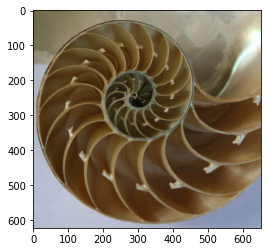

In [11]:
for f in X:
  plt.imshow(f, clim=(0.064, 0.068))
  

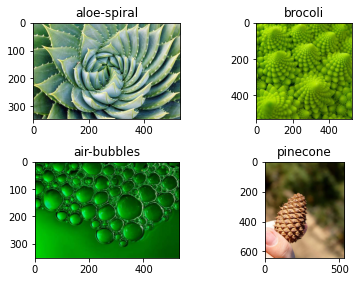

In [12]:
plot_n_image(X[:-1],Labels,4)

In [13]:
model = ResNet50(weights='imagenet')
image_prediction(model,50)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

aloe-spiral.jpg

Predicted: ('coil', 99.28587675094604)
broccoli-1.jpg
Predicted: ('broccoli', 66.43117070198059)
air-bubbles-2.jpg
Predicted: ('bubble', 45.6044465303421)
pinecone2.jpg
Predicted: ('sea_cucumber', 27.89953649044037)
fractals_nature.jpg.653x0_q80_crop-smart.jpg
Predicted: ('chambered_nautilus', 99.94205236434937)


In [14]:
#Extract features with VGG16
model = VGG16()
image_prediction(model,16)


aloe-spiral.jpg
Predicted: ('coil', 85.86033582687378)
broccoli-1.jpg
Predicted: ('cauliflower', 43.12864542007446)
air-bubbles-2.jpg
Predicted: ('chain_mail', 31.28640353679657)
pinecone2.jpg
Predicted: ('honeycomb', 25.767436623573303)
fractals_nature.jpg.653x0_q80_crop-smart.jpg
Predicted: ('chambered_nautilus', 99.7738242149353)


In [15]:
#Extract features with VGG19
base_model = VGG19()
image_prediction(base_model,19)

aloe-spiral.jpg
Predicted: ('coil', 99.2819607257843)
broccoli-1.jpg
Predicted: ('cauliflower', 85.71616411209106)
air-bubbles-2.jpg
Predicted: ('necklace', 31.665799021720886)
pinecone2.jpg
Predicted: ('acorn', 84.96872782707214)
fractals_nature.jpg.653x0_q80_crop-smart.jpg
Predicted: ('chambered_nautilus', 99.53280687332153)


In [16]:

model=InceptionV3()
image_prediction(model,3)

# create the base pre-trained model


aloe-spiral.jpg
Predicted: ('coil', 84.01581048965454)
broccoli-1.jpg
Predicted: ('cauliflower', 91.8545663356781)
air-bubbles-2.jpg
Predicted: ('honeycomb', 75.99433660507202)
pinecone2.jpg
Predicted: ('pineapple', 96.25329971313477)
fractals_nature.jpg.653x0_q80_crop-smart.jpg
Predicted: ('chambered_nautilus', 99.82097148895264)
